# An introduction
In this notebook is exploratory data analysis (EDA) performed on a dataset of animal strikes on aircraft from 1990 to 2015.

**Goals**  
I'll be using this opportunity to get a general idea of the dataset, as well as some of its traits and behavior, before trying to dig deeper into specific features and looking for patterns. At the end I'll offer some conclusions and ideas of where to go next. Comments explaining my thought process and conclusions are sprinkled throughout the notebook, but my more formal explanations will be in markdown.

In [ ]:
# only contains reported incidents so its difficult to compare to control
# we will see what factors are linked to bird and animal strikes on aircraft

# Understanding the dataset
In this section we'll mostly be observing features/columns.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airplane-strikes-dataset/Airplane Strikes Dataset.csv


**We begin by looking at the dimensions - # of rows and columns, and names of columns**:

In [3]:
# look at dimensions
data=pd.read_csv('../input/airplane-strikes-dataset/Airplane Strikes Dataset.csv')
print(data.shape)
data.columns

(174104, 66)


/tmp/ipykernel_32/3573306357.py:2: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('../input/airplane-strikes-dataset/Airplane Strikes Dataset.csv')


Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

We see features describing time/place, aircraft details, flight conditions, animal details, and the location of damages and strikes.  
  
**A look at a sample of data:**

In [4]:
# analyze behavior of features
# -> some things to note
"""
unknown airplanes
makes and models described by number
mass described by ???
engine position described by ???, NaN if not present most likely
numerous boolean values
0 for aircraft damage -> 0 for all others?
"""
pd.set_option('display.max_columns', None)
data.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**We see:**  
- Unidentified aircraft
- Makes and models described by number
- Mass and engine position described by some unknown discrete unit
- Numerous boolean values to describe damage
- A feature to describe the presence of any damage.

**We'll take another look at the missing values:**

In [5]:
# analyze null values
# -> 
"""
all damage noted
aircraft names noted but details forgone in many cases
can separate aircraft by # engines or engines recorded?
several details about flight conditions frequently missing - phase, visibility, precipitation, height, speed, distance, impact
species relatively well recorded
casualties frequently missing

"""
dict(data.isnull().sum())

{'Record ID': 0,
 'Incident Year': 0,
 'Incident Month': 0,
 'Incident Day': 0,
 'Operator ID': 0,
 'Operator': 0,
 'Aircraft': 0,
 'Aircraft Type': 41030,
 'Aircraft Make': 43053,
 'Aircraft Model': 51665,
 'Aircraft Mass': 46784,
 'Engine Make': 50670,
 'Engine Model': 52116,
 'Engines': 46762,
 'Engine Type': 46822,
 'Engine1 Position': 47911,
 'Engine2 Position': 55389,
 'Engine3 Position': 162445,
 'Engine4 Position': 171012,
 'Airport ID': 0,
 'Airport': 290,
 'State': 21976,
 'FAA Region': 18902,
 'Warning Issued': 97686,
 'Flight Phase': 55302,
 'Visibility': 64171,
 'Precipitation': 85782,
 'Height': 70427,
 'Speed': 102846,
 'Distance': 74391,
 'Species ID': 0,
 'Species Name': 80,
 'Species Quantity': 4477,
 'Flight Impact': 74639,
 'Fatalities': 173539,
 'Injuries': 173875,
 'Aircraft Damage': 0,
 'Radome Strike': 0,
 'Radome Damage': 0,
 'Windshield Strike': 0,
 'Windshield Damage': 0,
 'Nose Strike': 0,
 'Nose Damage': 0,
 'Engine1 Strike': 0,
 'Engine1 Damage': 0,
 'Engi

**We observe:**
- All damage noted
- Aircraft names recorded but details unidentified
- Can possibly separate analysis by # of engines
- Several details about flight conditions frequently missing
- Species seem relatively well recorded
- Casualties frequently missing  
Hopefully that implies no one was hurt...

**We'll take one more look at some features that I would like clarified:**

In [6]:
# we'll look at a couple of features that i want to clarify
# ->
"""
Warning issued, engine position values should be grouped
Flight phase can be ranked chronologically
"""
print("Warning issued: {}\n".format(data["Warning Issued"].unique()))
print("Flight Phase: {}\n".format(data["Flight Phase"].unique()))
print("Visibility: {}\n".format(data["Visibility"].unique()))
print("Precipitation: {}\n".format(data["Precipitation"].unique()))
print("Flight Impact: {}\n".format(data["Flight Impact"].unique()))
print("Fatalities: {}\n".format(data["Fatalities"].unique()))
print("Aircraft Mass: {}\n".format(data["Aircraft Mass"].unique()))
print("Engine3 Position: {}\n".format(data["Engine3 Position"].unique()))

Warning issued: [nan 'N' 'Y' 'n' 'y']

Flight Phase: ['CLIMB' 'TAKEOFF RUN' nan 'APPROACH' 'LANDING ROLL' 'EN ROUTE' 'DESCENT'
 'TAXI' 'PARKED' 'LOCAL' 'ARRIVAL' 'DEPARTURE' 'LANDING']

Visibility: [nan 'DAY' 'NIGHT' 'DUSK' 'DAWN' 'UNKNOWN']

Precipitation: [nan 'NONE' 'FOG' 'RAIN' 'SNOW' 'FOG, RAIN' 'RAIN, SNOW' 'FOG, SNOW'
 'FOG, RAIN, SNOW']

Flight Impact: [nan 'PRECAUTIONARY LANDING' 'OTHER' 'ABORTED TAKEOFF' 'NONE'
 'ENGINE SHUTDOWN' 'ENGINE SHUT DOWN']

Fatalities: [nan  1.  2.  0.  5.  8.]

Aircraft Mass: [ 4. nan  3.  1.  2.  5.]

Engine3 Position: [nan '1' '5' '4' 'CHANGE CODE' 1.0 5.0 4.0 '3']



**We observe:**
- Features such as Warning Issued and Engine Position definitely need some engineering
- Flight phase can possibly be ranked chronologically  
Besides this I mainly got a clearer idea of some categorical variables.

**Notes**  
There are several features in this dataset that I'm interested in. We'll do a rough sorting of them and analyze in order:
- Categorical: Operator, Aircraft, Airport, State, FAA Region, Warning*, Species, Visibility*, Precipitation*
- Ordinal: Flight Phase
- Discrete: Year, Month, Day, # of Engines, Mass, Engine Position
- Continuous: Height*, Speed*, Distance*, Species Quantitiy
- Boolean: Aircraft Part Struck/Damaged  
  
**We can try to understand:**
- Common culprits of strikes (both human and animal)
- When they occur
- What parts of the plane are most often struck and damaged  
And numerous multivariate relationships.  
  
Something to note about this dataset is that every row is an instance of a strike, so it is difficult to compare to a control environment. In light of this I'll be looking at lots of totals and percentages.

In [ ]:
# categorical, ordinal, discrete, continuous
# -> we look at features of interest
"""
cat: operator/id, aircraft, airport/id, state, region, warning*, species/id, visibility*, precipitation*
ord: phase
dis: year, month, day, engines
con: mass, engine position, height*, speed*, distance*, quantity
boolean: aircraft part
"""
# we can try to understand:
"""
common culprits of strikes (both humans and birds)
when they occur
what part of place most often struck
what part of plane most susceptible to damage
"""

# Analyzing Values
**We'll begin by looking at some general categorical details - who, what, and where.**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

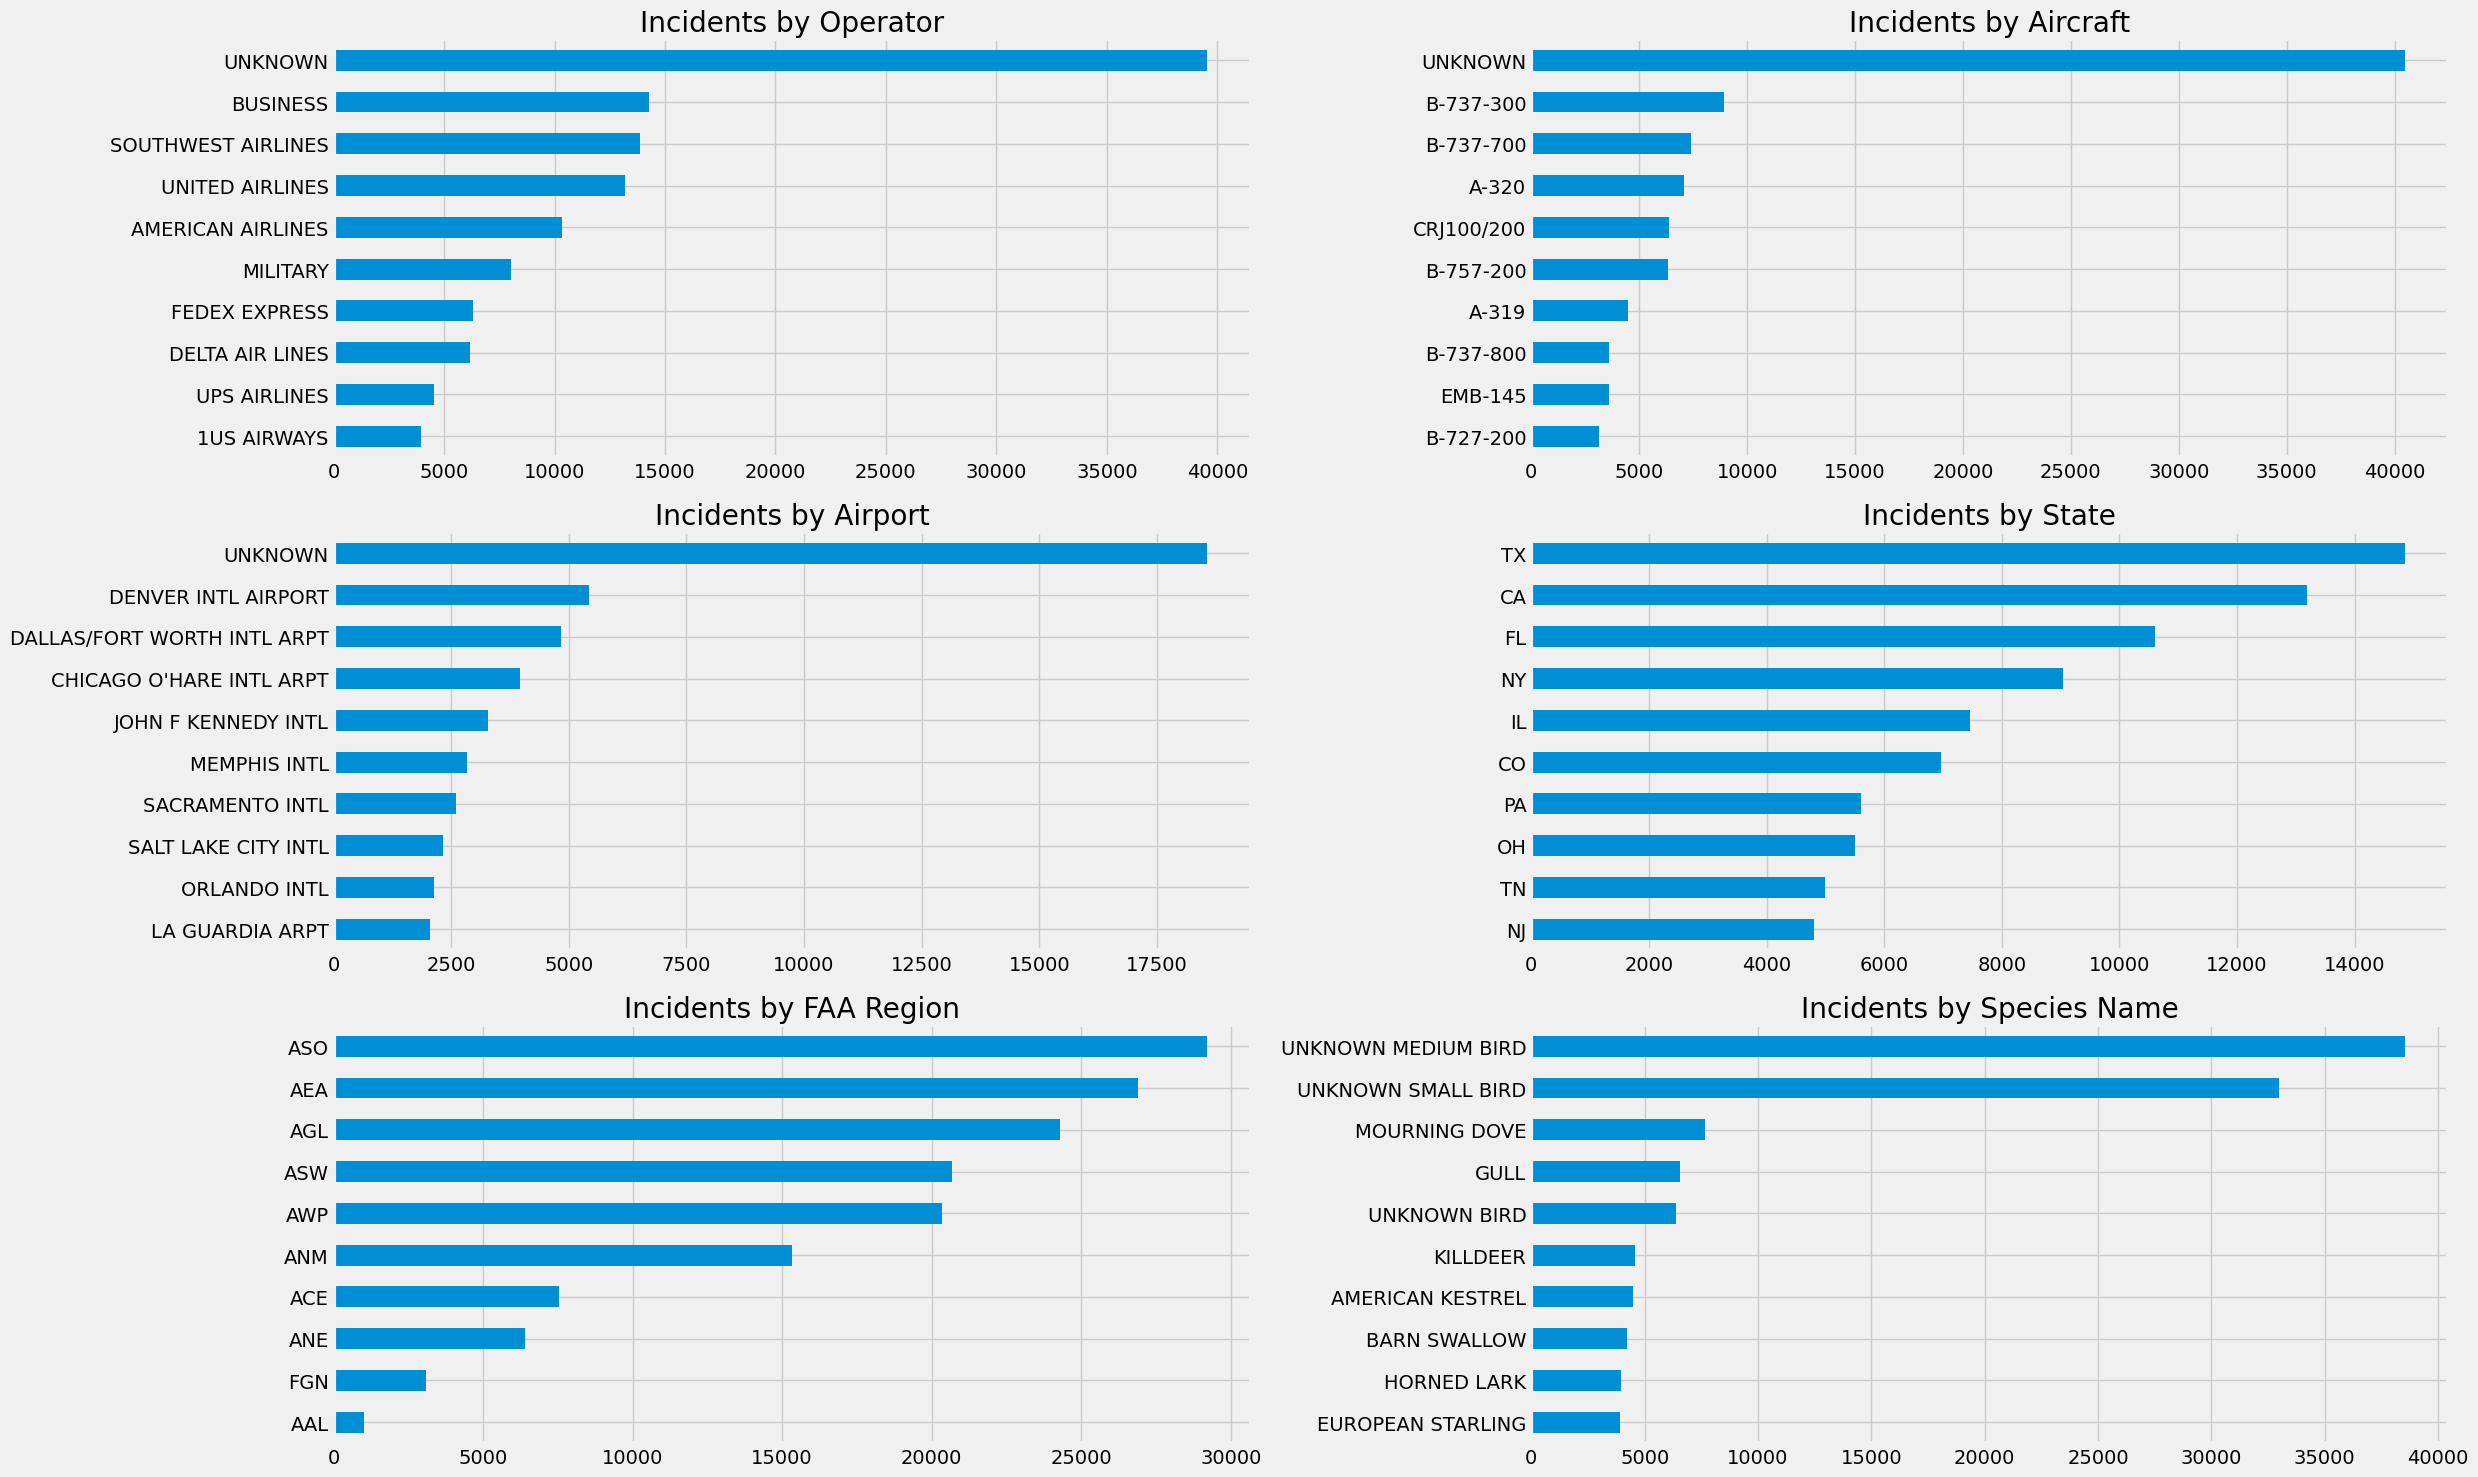

In [8]:
# univariate analysis of categorical variables
# ->
"""
Lots of unknowns
Business jets have the largest share of identified incidents, but large airliners are the most commonly identified aircraft
Incidents proportional to large & populous states - Colorado and Tenessee possible anomalies
Appear proprotional to frequency of weather conditions compared to flights
Need a closer look?
"""
features = ["Operator", "Aircraft", "Airport", "State", "FAA Region", "Species Name"]
ct = 0
f, ax = plt.subplots(3,2,figsize=(25,15))
for ft in features:
    data[features][ft].value_counts(ascending=True)[-10:].plot.barh(ax=ax[ct // 2][ct % 2])
    ax[ct // 2][ct % 2].set(title="Incidents by {}".format(ft), ylabel=None)
    ct += 1

plt.tight_layout()
plt.show()

There are a lot of unknowns, which is always fun...  
**We observe:**
- Business jets have the largest share of identified incidents, but large airliners are the most commonly identified aircraft
- Incidents appear proportional to large & populous states, although Colorado and Tenessee are possible anomalies
- Appear proprotional to frequency of weather conditions compared to flights  
So in essence many of those details seem like they are to be expected. We may need a closer look at these factors through multivariate analysis.

**Next we'll look at the time:**

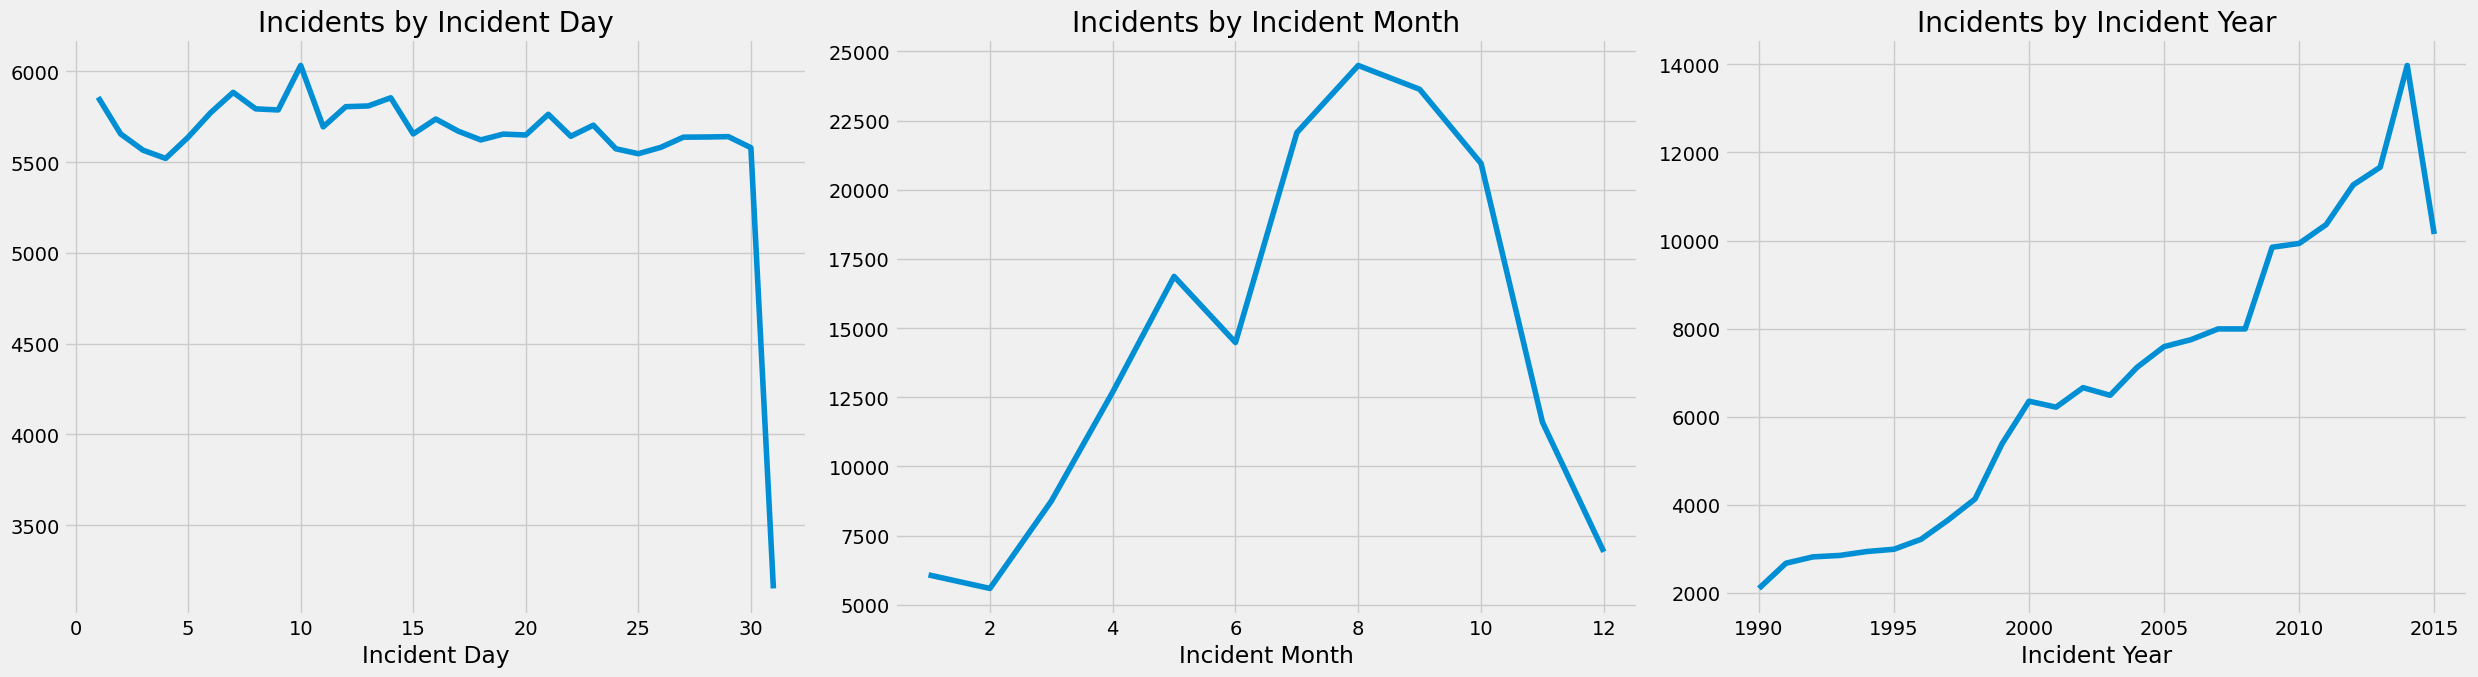

In [9]:
# univariate analysis of time
# -> large fluctuation throughout year, large increase over years before sudden drop
# day chart may be withholding info - any flucuations between days in certain months
features = ["Record ID", "Incident Day", "Incident Month", "Incident Year"]
ct = 0
f, ax = plt.subplots(1,3,figsize=(25,7))
for ft in features:
    if ft == "Record ID":
        continue
    else:
        data[features].groupby(ft)["Record ID"].count().plot(ax=ax[ct])
        ax[ct].set(title="Incidents by {}".format(ft))
        ct += 1
    
plt.tight_layout()
plt.show()

**There's some interesting stuff here:**
- Incidents vary greatly throughout the year. My guess would be that birds and other animals are busy migrating through the United States in the summer months and run intro traffic. Worth investigation.
- The number of incidents reported by the year increases by almost 7x between 1990 and 2014. My guess would be an increas in cases recorded is more likely than an increase in the actual number of animals. I can't explain the drop however - maybe the data cuts off early.
- The data day-to-day doesn't reveal much at surface level, but I wouldn't write it off. There could be patters in certain months that are not visible here.

**Next we look at discrete flight conditions:**

In [ ]:
"""
common culprits of strikes (both humans and birds)
when they occur
what part of place most often struck
what part of plane most susceptible to damage

incidents by flight conditions - height*, speed*, distance*
incidents by engines, mass, engine position

most dangerous birds
birds likely to strike in groups
parts ranked by strikes
parts ranked by damage
parts ranked by strike/damage

time series
distribution - freq vs some disc. variable or binned continuous variable
statistical test?
"""

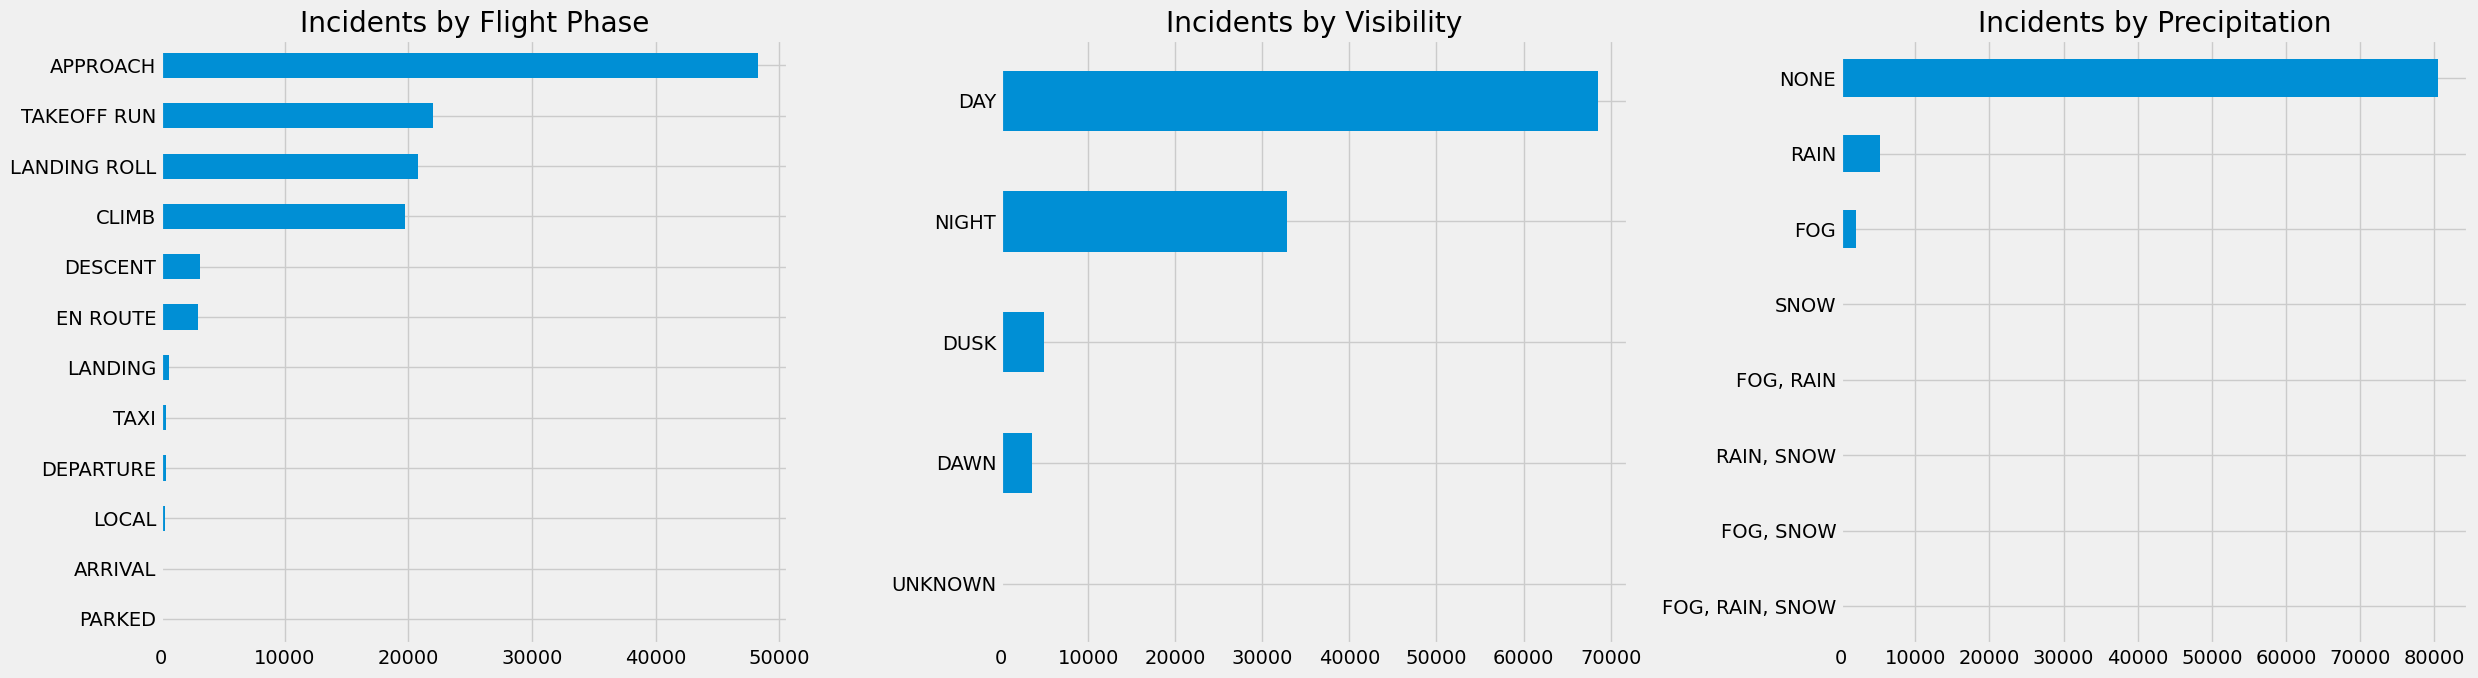

In [10]:
# analysis of discrete flight conditions
# -> would be useful to add eg instances of fog, rain to both fog & rain
features = ["Flight Phase", "Visibility", "Precipitation"]
f, ax = plt.subplots(1,3,figsize=(25,7))
ct = 0
for ft in features:
    data[features][ft].value_counts(ascending=True).plot.barh(ax=ax[ct])
    ax[ct].set(title="Incidents by {}".format(ft), ylabel=None)
    ct += 1

plt.tight_layout()
plt.show()

**We observe:**
- Approach appears to be the most dangerous phase of flight - more generally it seems to be any time the plane is fast-moving but still low to the ground.
- Visibility and precipitation seem to correlate with frequency of the conditions and would need another look.
- The precipitation feature could use some engineering - it may be useful in some cases to, for example, take all cases of incidents in simultaneous fog & rain, and add them to both individual categories.

**We move on to continuous flight conditions:**

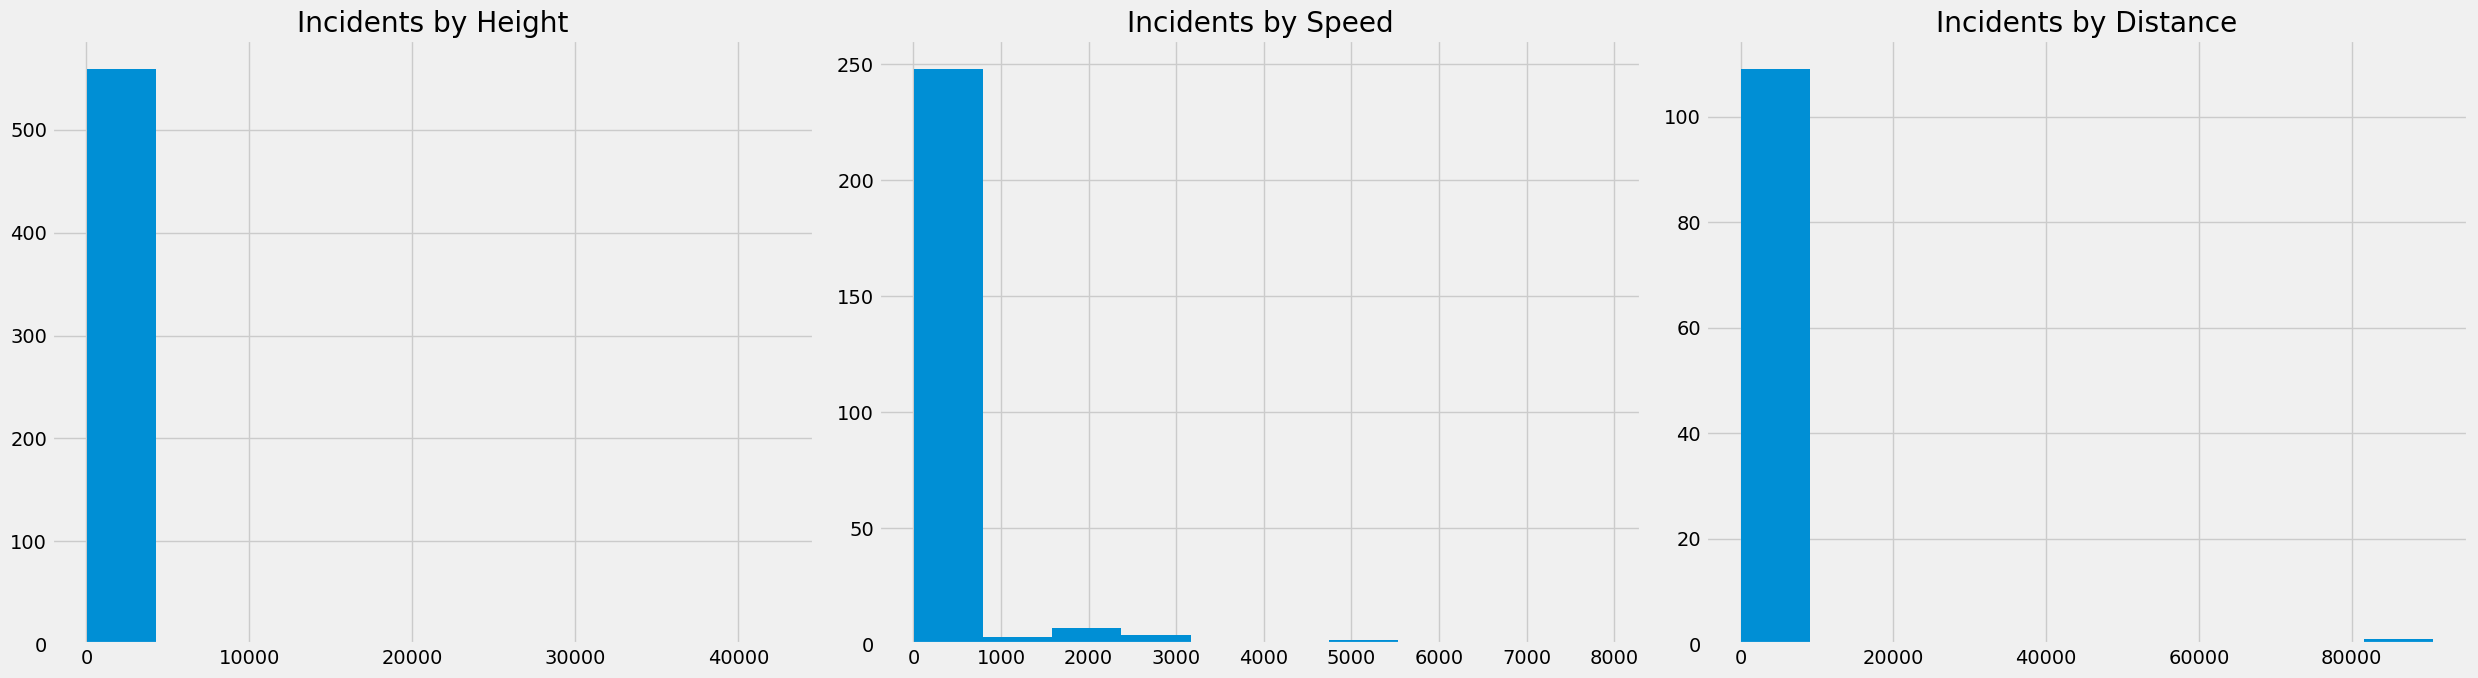

In [11]:
# analysis of continuous flight conditions - height, speed, distance
# -> most recorded incidents in these categories seem to happen in the beginning of flight
# -> a log transformation might be nice to analyze details of higher values
features = ["Height", "Speed", "Distance"]
f, ax = plt.subplots(1,3,figsize=(25,7))
ct = 0
for ft in features:
    data[features][ft].value_counts(ascending=True).plot.hist(ax=ax[ct])
    ax[ct].set(title="Incidents by {}".format(ft), ylabel=None)
    ct += 1

plt.tight_layout()
plt.show()

**Obervations:**
- I'm not entirely clear on the meaning of distance - orginially I believed that it was the distance that the plane had travelled since departure. However a majority of incidents happening during approach and landing would lead me to believe that many of the recorded distances would be towards the end. While typing this it dawned on me that most of these flights are relatively short distances.
- I'm highly inclined to use some type of transformation - possibly logarithmic - on these graphs.
- A reminder that in almost a majority of the records in this dataset, these and the last set of factors were not recorded at all; we get have a decent but not comprehensive picture.

**A look at aircraft details:**

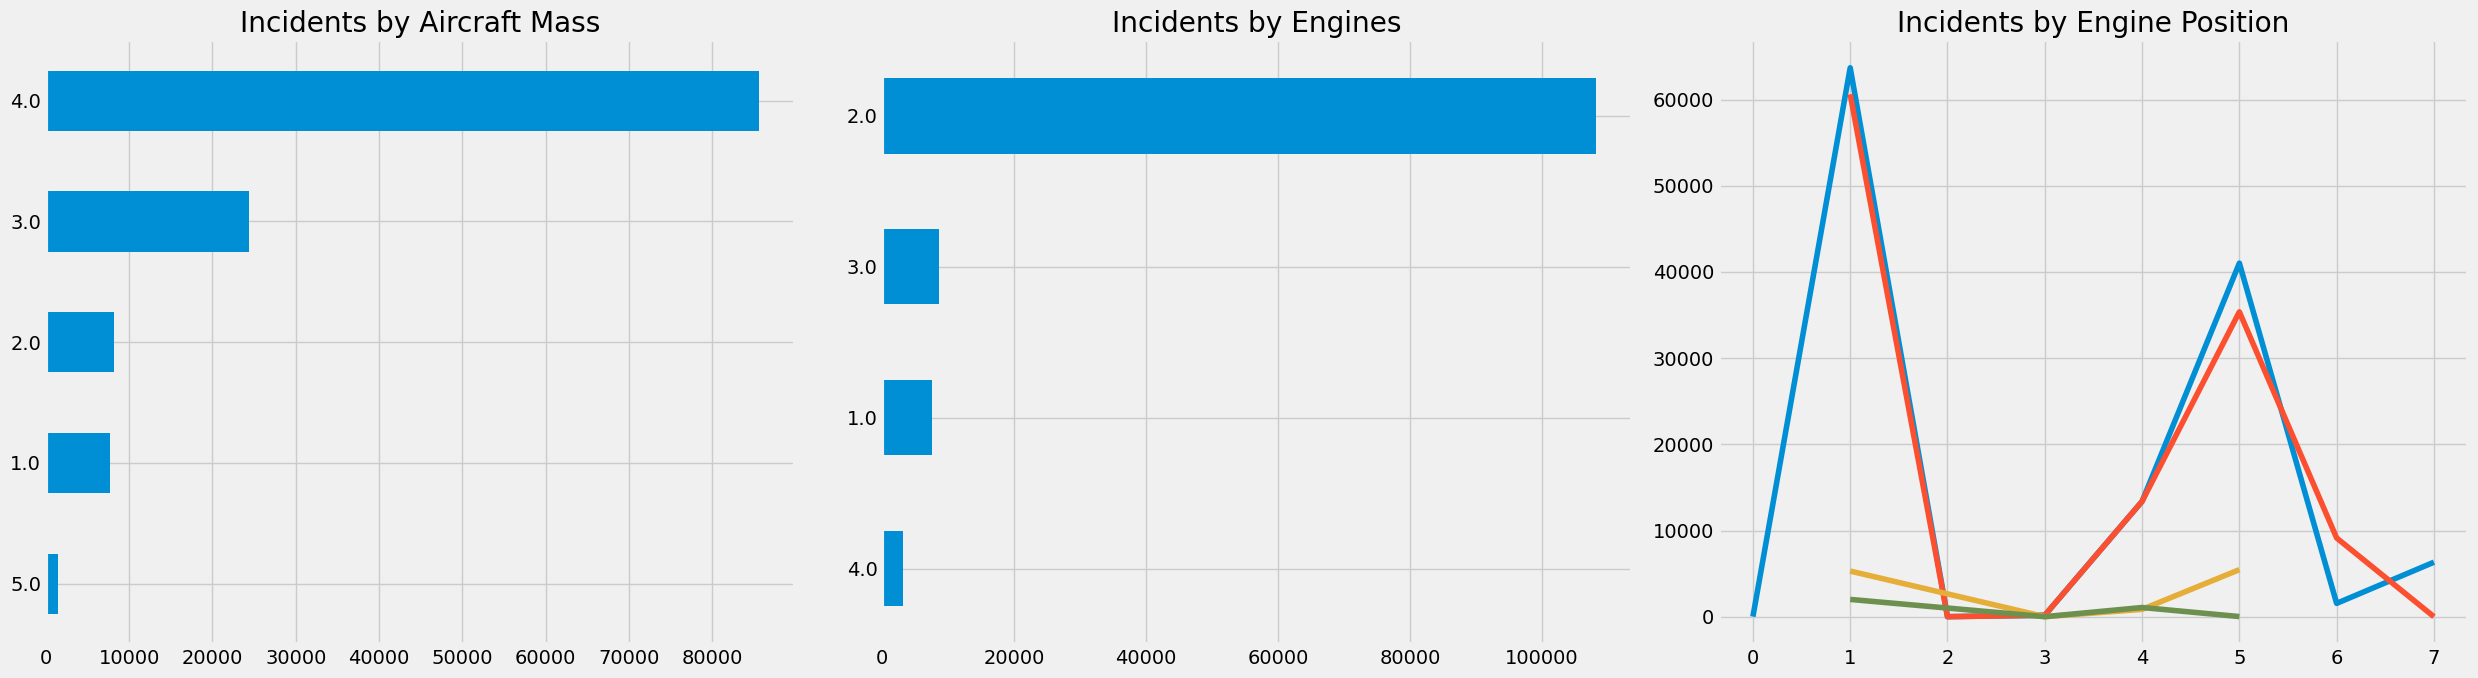

In [12]:
# analysis of 
# -> 3rd graph unclear but we can decipher some things
from re import match

features = ["Aircraft Mass", "Engines", "Record ID"]
for i in range(4):
    features.append("Engine{} Position".format(i+1))

# clean data and standardize datatype
df = data[features[2:7]]
df = df[df["Engine3 Position"] != "CHANGE CODE"]
for ft in features[2:7]:
    df.loc[df[ft] == 'C', ft] = 0
    df[ft] = df[ft].astype('str').astype('float')

ct = 0
f, ax = plt.subplots(1,3,figsize=(25,7))
for ft in features:
    if ft == "Record ID":
        continue
    elif ft not in list(filter(lambda v: match('Engine. Position', v), features)):
        data[features][ft].value_counts(ascending=True).plot.barh(ax=ax[ct])
        ax[ct].set(title="Incidents by {}".format(ft), ylabel=None)
    else:
        df.groupby(ft)["Record ID"].count().plot(ax=ax[2], xlabel="")
    ct += 1
        
ax[2].set(title="Incidents by Engine Position".format(ft))
plt.tight_layout()
plt.show()

**Obervations:**
- "Heavier" aircraft, as well as twin-engine aircraft make up the vast majority of these incidents.
- The third graph was an attempt to describe the incidents based on where the engines are located. An lack of experience in matplotlib unfortunately prevented me from being able to provide a legend, but we can assume that the red and blue lines are the positions of twin engines, while the yellow and green lines are a 3rd and 4th engine.
- My guess is that the numbers could describe a lateral position of the engines.
- The animals may be attracted to one side of the aircraft more than the other; I'm finding it difficult to draw a conclusion from the 3rd graph.

**Analysis of animals:**

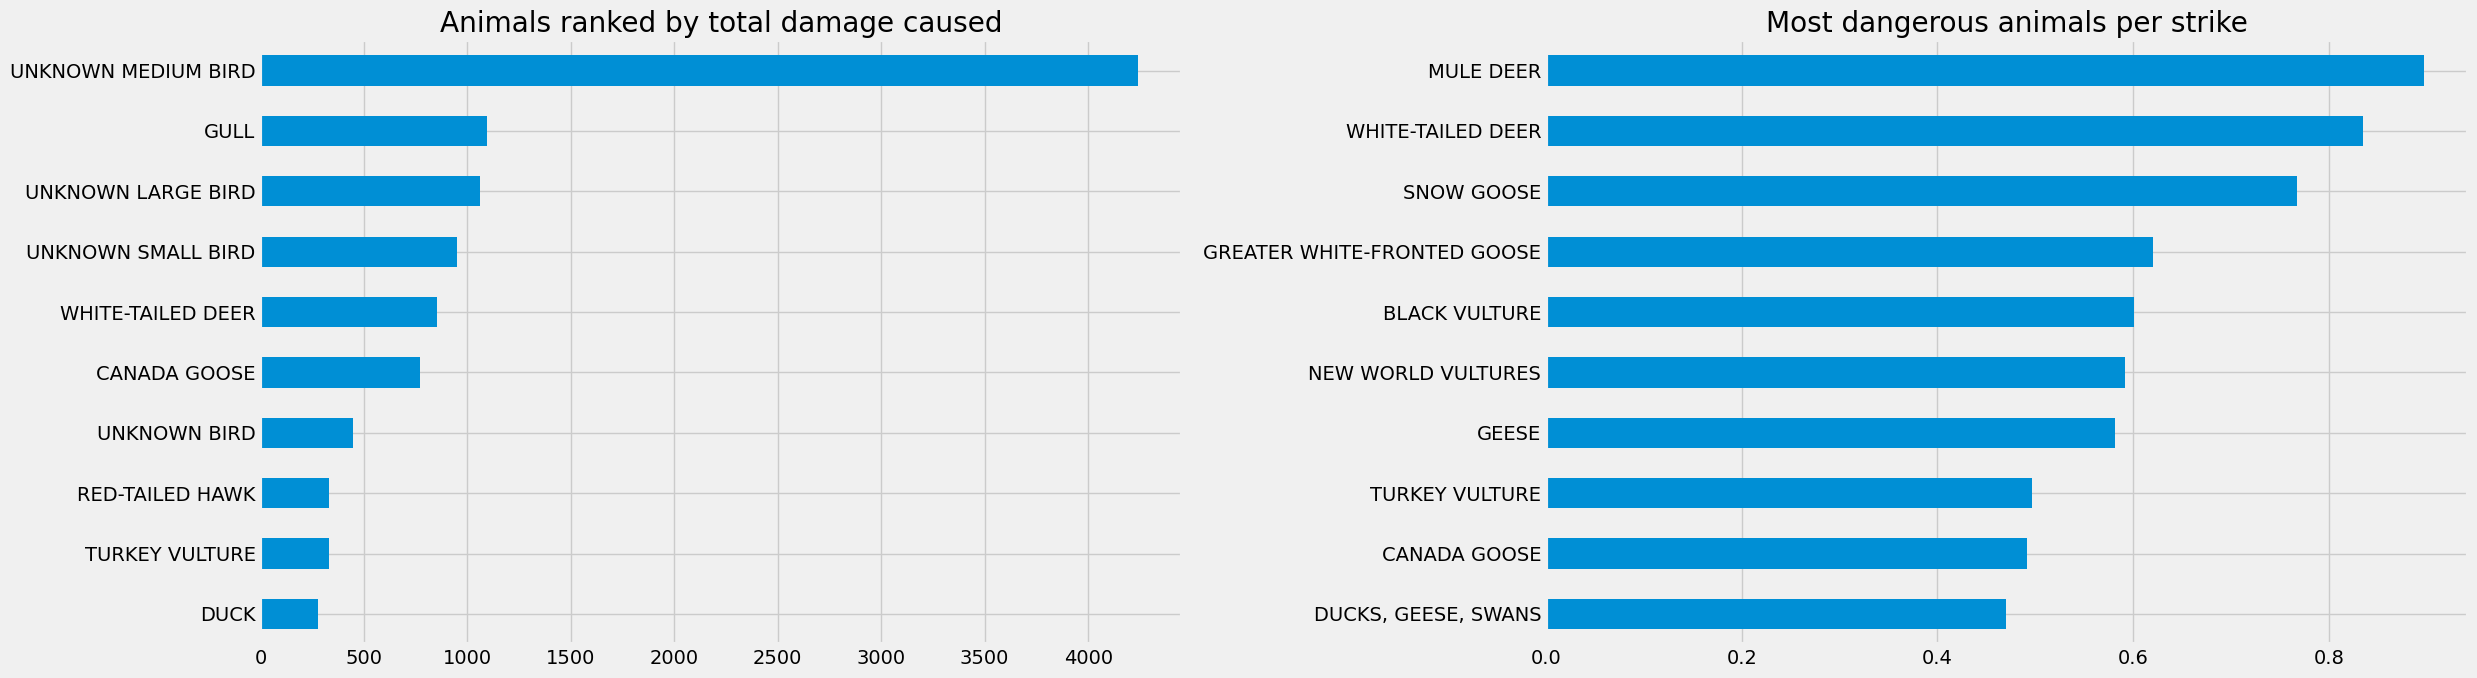

In [13]:
# most dangerous animals and animals
# -> most dangerous animals by damage and ratio differ from most common animals
data.loc[data["Aircraft Damage"] == 1].head()

f, ax = plt.subplots(1,2,figsize=(25,7))
dmg = data.loc[data["Aircraft Damage"] == 1]["Species Name"].value_counts(ascending=True)
dmg[-10:].plot.barh(ax=ax[0])
ax[0].set(title="Animals ranked by total damage caused".format(ft), ylabel=None)

# of animals in dmg keys, merge cols and divide
dmg = dmg[-50:].to_frame()
dmg.rename(columns={"count":"dmg_count"}, inplace=True)
danger = dmg.join(data["Species Name"].value_counts(ascending=True), how="left")
danger["ratio"] = danger["dmg_count"] / danger["count"]
danger = danger["ratio"].sort_values(ascending=True)
danger[-10:].plot.barh(ax=ax[1])
ax[1].set(title="Most dangerous animals per strike".format(ft), ylabel=None)

plt.tight_layout()
plt.show()

**Observations:**
- These graphs are completely different from the earlier graph from describing frequency. Large birds seem to cause the majority of damage to airplanes.
- We construct a ratio of the animals most likely to cause damage in a random strike. There are several animals in the dataset with 1 recorded strike and damage caused, so we extract from only the 50 most common animals. Deer are the most dangerous common animal, followed by several large birds.

**Analysis of parts**

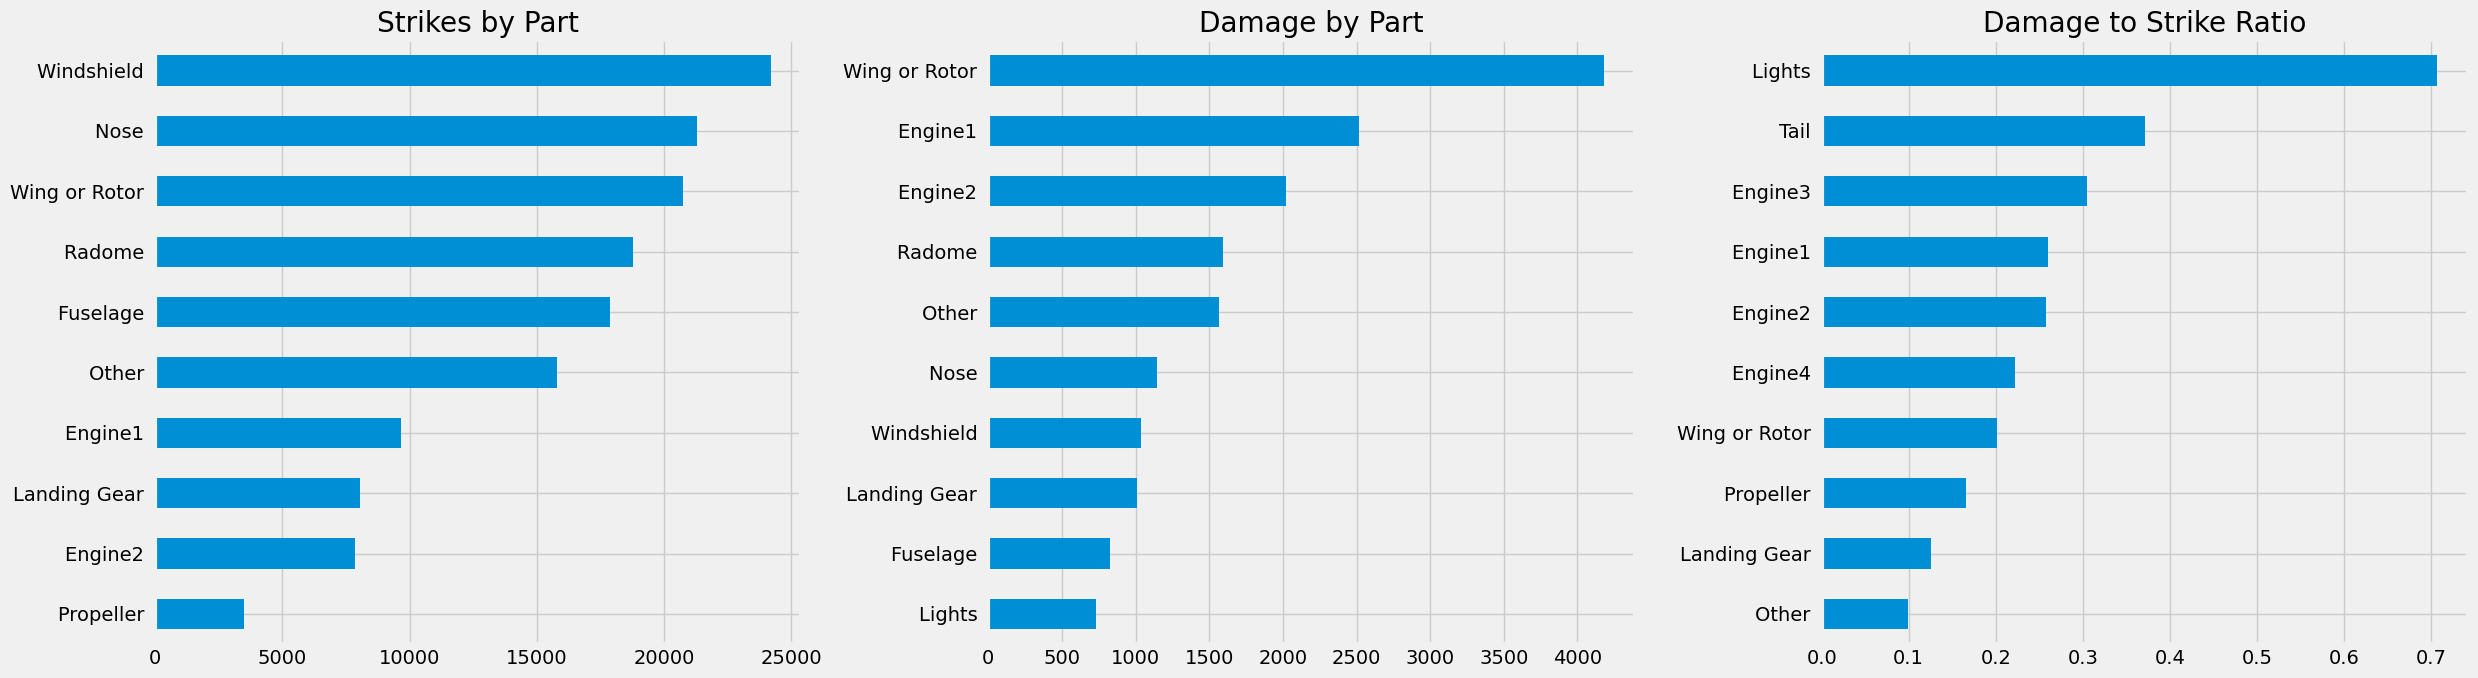

In [16]:
# parts ranked by strikes, damage, and weakness
import re

features = set()

for col in data.columns:
    if re.search("Strike$", col):
        features.add(col[:-6])
str_dmg = pd.DataFrame({"Strikes by Part": [], "Damage by Part": [], "Damage to Strike Ratio": []})
for ft in features:
    num_str = data.loc[data[ft + "Strike"] == 1].shape[0]
    num_dmg = data.loc[data[ft + "Damage"] == 1].shape[0]
    ratio = num_dmg / num_str
    str_dmg.loc[ft] = [num_str, num_dmg, ratio]

ct = 0
f, ax = plt.subplots(1,3,figsize=(25,7))
for col in str_dmg.columns:
    str_dmg[col].sort_values(ascending=True)[-10:].plot.barh(ax=ax[ct])
    ax[ct].set(title=col, ylabel=None)
    ct += 1

plt.tight_layout()
plt.show()   

**We observe:**
- The windshield, nose, wing, and radome (similar to nose) are most susceptible to strikes, but they vary less than other comparisons we have made.
- Wings, rotors, engines, and nose/radome are most often damaged.
- Lights will easily take damage, in more than half of all strikes. Tail and engines follow.

# Conclusion
The analysis was a little rudimentary but we have a good idea of the behavior of the data. There are some particularly interesting variables eg. Species Quantity and Warning Issued that I would like to look at. Some proficiency in matplotlib, pandas, and seaborn would help clear up some things as well.  
  
Logically multivariate analysis would follow. We could investigate questions such as:
- Are specific planes or military planes more susceptible to different accidents?
- How to conditions change between regions?
- How dangerous are different sizes of animal groups?  
  
But most of all I believe that what we investigate next depends on our goal with the dataset. Depending on our conditions, as well as any statistical or ML problem we are faced with, we could really narrow things down.

I've personally wanted to develop my skills working with time series models and see an opportunity here. We could construct a time series with our data and model the cyclical changes in accident frequency. With the help of other features in the dataset we could have a good idea of accident risk. I've also seen people work with statistical models, correlation, mutual information, etc. and would be curious to see if there are any features we could engineer and extract as relevant.

The end.